# INTRODUCTION

Here, we'll examine the illnesses affecting a sample dataset of patients, categorize them according to their shared conditions and ages, and examine the most frequently prescribed medications.

# CONTEXT

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

Beginning in the early 1960s, the NHANES program has been carried out as a series of surveys that concentrate on various population groups or health-related issues. In order to address new demands, the survey was transformed into a continuous program in 1999 with a shifting emphasis on different health and nutrition variables. The study investigates a nationally representative sample of roughly 5,000 persons each year. These people are spread out across the nation's counties, 15 of which get tourists each year.

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel

Reference: https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm

## Study Objectives
- The main objective of the study is to find out which are the most commonly affecting diseases in in all age groups and evaluate the highly affected age group. Even though there are multiple medications used for a specific medical condition, here we find out the most popularly prescribed medication for that particular disease. So this can give an idea that which are the most popularly used medications that have high efficacy and few side affects. 
- This study also represents top diseases in all age groups.

# ABOUT DATASET

Dataset is downloaded from kaggle website from the below link. Considering Demographics and medications dataset.
https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey

A complete variable dictionary for both the datasets can be found here -  
https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013

- Deomographics data set have requiered fields such as patient identification number, age, gender.
- Medications dataset have information such as type of disease and type of medications used for the corresponding disease which are our required fields in this dataset.

#  Variables of Interest

The documentation for both datasets was examined and a final set of variables of interest collected. Concepts of interest are summarized below:
- SEQN - Respondent sequence number
- RIAGENDR - Gender of the participant
- RIDAGEYR - Age of the participant
- RXDDRUG - Generic drug name
- RXDRSD1 - Type of disease

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Importing "demographics.xlsx" and "medications.csv" files using pandas.
df_demo = pd.read_excel('demographic.xlsx')
df_meds = pd.read_csv('medications.csv', encoding = 'latin1')

In [3]:
df_demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [4]:
df_meds.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


We have patient attributes such as identity number, age, gender in demographics dataset,
where as, in medication dataset we have disease and corresponding medications for that patient. 
Hence we are merging both the datasets in the next step.

In [5]:
# Merging demographics and medications data sets with common "SEQN"
merged_df = pd.merge(df_demo, df_meds, left_on="SEQN", right_on="SEQN", how="inner")
merged_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [6]:
# Dropping off the age with values 0 
merged_df.drop(merged_df[merged_df["RIDAGEYR"] == 0].index, inplace=True)

Categorizing the age into particular ranges to perform mathematical calculations and extract the required age range. 

In [7]:
#  Categorizing the age 
merged_df["AgeByCategory"] = pd.cut(x=merged_df["RIDAGEYR"], bins=[0,20,40,60,80],
                    labels=['1-20', '21-40', '41-60',
                            '61-80'])

In [8]:
# Calculating the count of specified age ranges. 
age_by_counts = merged_df["AgeByCategory"].value_counts()
age_by_counts

61-80    7408
41-60    5021
1-20     4675
21-40    2668
Name: AgeByCategory, dtype: int64

In the next step, the graph represents the bar plot which has number of patients in Y-axis and age-groups in the X-axis.

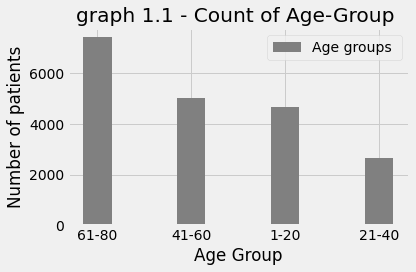

In [9]:
plt.style.use("fivethirtyeight")

ages_x = list(age_by_counts.index)

dev_y = list(age_by_counts.values)

plt.bar(ages_x, dev_y,width=0.3, color=['grey'], align='center',label='Age groups ')

plt.legend()

plt.title("graph 1.1 - Count of Age-Group ")
plt.xlabel("Age Group")
plt.ylabel("Number of patients")

plt.tight_layout()

plt.show()

The above graph represents that age-group (61-80) are highly affected by one or more disease.

In [10]:
# Converting values in gender column i.e, 1 as male, 2 as female.
merged_df["RIAGENDR"].replace({1: "Male", 2: "Female"}, inplace=True)

In [11]:
# Grouping by gender 
merged_df.groupby("RIAGENDR").size()

RIAGENDR
Female    10556
Male       9216
dtype: int64

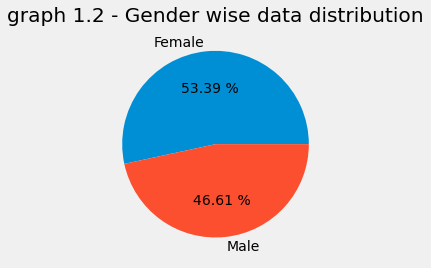

In [12]:
# plottng a pie chart to represent which gender is highly affected.
labels = ["Female","Male"]
plt.pie([merged_df["RIAGENDR"].value_counts()["Female"], merged_df["RIAGENDR"].value_counts()["Male"]],
       labels=labels, autopct='%.2f %%')
plt.title("graph 1.2 - Gender wise data distribution")
plt.show()

From the above pie chart it represents that females(53.3%) are highly affected than males(46.6%)

In [13]:
# Performing few data cleaning to drop off unwanted values in "RXDDRUG" column
unwanted_drug_data = ['99999', '55555', '77777']
flter = merged_df["RXDDRUG"].isin(unwanted_drug_data)
merged_df = merged_df[~flter]

In [14]:
# Dropping off Nan values from the "RXDDRUG" column
merged_df["RXDDRUG"].dropna(inplace=True)

In [15]:
# merged_df["RXDDRUG"].to_list()

In [16]:
# Extracting only required fields from the main source for ease of view.
final_med_df=merged_df[["SEQN", "RIAGENDR", "RIDAGEYR", "AgeByCategory", "RXDDRUG", "RXDRSD1"]]
final_med_df

,SEQN,RIAGENDR,RIDAGEYR,AgeByCategory,RXDDRUG,RXDRSD1
1,73557,Male,69,61-80,INSULIN,Type 2 diabetes mellitus
2,73558,Male,54,41-60,GABAPENTIN,Restless legs syndrome
3,73558,Male,54,41-60,INSULIN GLARGINE,Type 2 diabetes mellitus
4,73558,Male,54,41-60,OLMESARTAN,Type 2 diabetes mellitus with kidney complicat...
5,73558,Male,54,41-60,SIMVASTATIN,Pure hypercholesterolemia
...,...,...,...,...,...,...
20189,83727,Male,26,21-40,NaN,NaN
20190,83728,Female,2,1-20,NaN,NaN
20191,83729,Female,42,41-60,NaN,NaN
20192,83730,Male,7,1-20,NaN,NaN


In [17]:
# To avoid discrepancies in the further calculations, excluding the rows if it has any null vlaues in any field.
final_med_df.dropna(axis = 0, how ='any', inplace=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
final_med_df

,SEQN,RIAGENDR,RIDAGEYR,AgeByCategory,RXDDRUG,RXDRSD1
1,73557,Male,69,61-80,INSULIN,Type 2 diabetes mellitus
2,73558,Male,54,41-60,GABAPENTIN,Restless legs syndrome
3,73558,Male,54,41-60,INSULIN GLARGINE,Type 2 diabetes mellitus
4,73558,Male,54,41-60,OLMESARTAN,Type 2 diabetes mellitus with kidney complicat...
5,73558,Male,54,41-60,SIMVASTATIN,Pure hypercholesterolemia
...,...,...,...,...,...,...
20182,83724,Male,80,61-80,LOSARTAN,Essential (primary) hypertension
20183,83724,Male,80,61-80,MESALAMINE,"Noninfective gastroenteritis and colitis, unsp..."
20184,83724,Male,80,61-80,ROPINIROLE,Restless legs syndrome
20185,83724,Male,80,61-80,TERAZOSIN,Essential (primary) hypertension


The next step is about computing count of individual diseases in corresponding age groups  

In [19]:
age_grp = final_med_df.groupby(["AgeByCategory","RXDRSD1"]).size()
age_grp

AgeByCategory  RXDRSD1                                           
1-20           Abdominal distension (gaseous)                         1
               Abnormal results of liver function studies             0
               Abnormal sputum                                        0
               Abnormal uterine and vaginal bleeding, unspecified     1
               Acne                                                  31
                                                                     ..
61-80          Vitamin deficiency, unspecified                        0
               Vomiting                                               0
               Wheezing                                               8
               Xerosis cutis                                          3
               Zoster [herpes zoster]                                 7
Length: 1876, dtype: int64

In [20]:
# Extracting Top 3 diseases in all age groups
top_3_disease_age = age_grp.groupby(level='AgeByCategory').nlargest(3).reset_index(level=0, drop=True)
top_3_disease_age

AgeByCategory  RXDRSD1                                               
1-20           Asthma                                                     270
               Attention-deficit hyperactivity disorders                  150
               Allergic rhinitis, unspecified                              75
21-40          Essential (primary) hypertension                           123
               Major depressive disorder, single episode, unspecified      95
               Anxiety disorder, unspecified                               88
41-60          Essential (primary) hypertension                           741
               Pure hypercholesterolemia                                  355
               Type 2 diabetes mellitus                                   337
61-80          Essential (primary) hypertension                          1549
               Pure hypercholesterolemia                                  780
               Type 2 diabetes mellitus                                 

In [21]:
# Converting the above series into a dataframe
age_drug_df = top_3_disease_age.to_frame(name="MaxDiseaseCount")
age_drug_df

MaxDiseaseCount
AgeByCategory RXDRSD1                                                            
1-20          Asthma                                                          270
              Attention-deficit hyperactivity disorders                       150
              Allergic rhinitis, unspecified                                   75
21-40         Essential (primary) hypertension                                123
              Major depressive disorder, single episode, unsp...               95
              Anxiety disorder, unspecified                                    88
41-60         Essential (primary) hypertension                                741
              Pure hypercholesterolemia                                       355
              Type 2 diabetes mellitus                                        337
61-80         Essential (primary) hypertension                               1549
              Pure hypercholesterolemia                                       780
              Type 2 diabetes mellitus                                        526

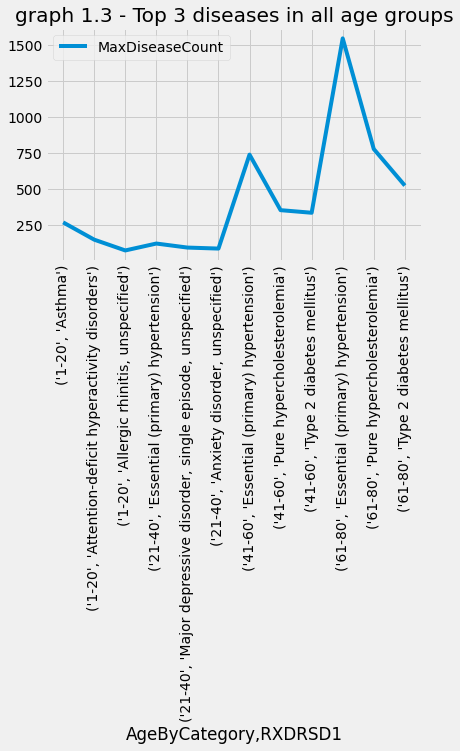

In [22]:
# Plotting a line chart that discribes the top 3 diseases of all age groups.
ax = age_drug_df.plot()
ax.set_xticks(range(len(age_drug_df)))
ax.set_xticklabels([item for item in age_drug_df.index.tolist()], rotation=90)
plt.title('graph 1.3 - Top 3 diseases in all age groups')
plt.show()

The above graph represents that the age group(61-80) with hypertension has the highest peak of more than 1500 patients.

From here we focus on age group 61-80 i.e, most common health problems in elderly patients and the corresponding common drugs prescribed by the medical practioner for that particular disease.

In [23]:
# Here we are computing top 10 most common diseases in elderly patients(age group 61-80)
age_grp_6080_diseases = final_med_df.groupby("AgeByCategory").get_group("61-80").value_counts("RXDRSD1").nlargest(10)
age_grp_6080_diseases

RXDRSD1
Essential (primary) hypertension                          1549
Pure hypercholesterolemia                                  780
Type 2 diabetes mellitus                                   526
Gastro-esophageal reflux disease                           238
Hypothyroidism, unspecified                                176
Major depressive disorder, single episode, unspecified     172
Anxiety disorder, unspecified                              146
Dorsalgia, unspecified                                     110
Asthma                                                     109
Prevent heart attack/myocardial infarction                 107
dtype: int64

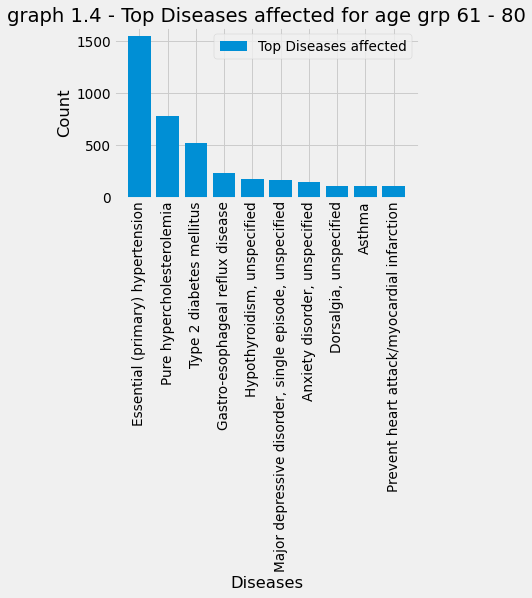

In [24]:
# Plotting a bar graph to represent top 10 diseases in elderly patients.
import numpy as np
X =list(age_grp_6080_diseases.index)
Y = list(age_grp_6080_diseases.values)
plt.figure(figsize=(5,3), dpi=70)

plt.bar(X, Y, label = 'Top Diseases affected')
X_axis = np.arange(len(X))
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Diseases")
plt.ylabel("Count")
plt.title("graph 1.4 - Top Diseases affected for age grp 61 - 80")
plt.legend()
plt.show()

In [25]:
grouped_data_by_diseases_drug = final_med_df.groupby("AgeByCategory").get_group("61-80").groupby(["RXDRSD1", "RXDDRUG"]).size()
grouped_data_by_diseases_drug

RXDRSD1                                     RXDDRUG      
Abdominal distension (gaseous)              HYOSCYAMINE      1
Abnormal results of liver function studies  ENTECAVIR        1
Acquired absence of both cervix and uterus  ESTRADIOL        1
Acute atopic conjunctivitis                 DESLORATADINE    1
                                            LORATADINE       1
                                                            ..
Zoster [herpes zoster]                      ACYCLOVIR        3
                                            GABAPENTIN       1
                                            OXYCODONE        1
                                            PREGABALIN       1
                                            VALACYCLOVIR     1
Length: 1416, dtype: int64

In [26]:
df_total_drg_cnt = grouped_data_by_diseases_drug.to_frame(name="MedicationCount").groupby("RXDRSD1")["MedicationCount"].sum()
total_counts_drug = df_total_drg_cnt[(age_grp_6080_diseases.index)]
total_counts_drug

RXDRSD1
Essential (primary) hypertension                          1549
Pure hypercholesterolemia                                  780
Type 2 diabetes mellitus                                   526
Gastro-esophageal reflux disease                           238
Hypothyroidism, unspecified                                176
Major depressive disorder, single episode, unspecified     172
Anxiety disorder, unspecified                              146
Dorsalgia, unspecified                                     110
Asthma                                                     109
Prevent heart attack/myocardial infarction                 107
Name: MedicationCount, dtype: int64

In [27]:
# Here we are extracting top 3 most commonly used medications for its corresponding disease.
disease_meds_top_3 = grouped_data_by_diseases_drug.groupby(level='RXDRSD1').nlargest(3).reset_index(level=0, drop=True)
diseases_drug_df = disease_meds_top_3.to_frame(name="MedicationCount")
diseases_drug_df.tail()

MedicationCount
RXDRSD1                RXDDRUG                                  
Xerosis cutis          AMMONIUM LACTATE TOPICAL                2
                       LACTIC ACID TOPICAL                     1
Zoster [herpes zoster] ACYCLOVIR                               3
                       GABAPENTIN                              1
                       OXYCODONE                               1

In [28]:
# Calculating percentage of individual drug given to a particular disease.

# Individual_drug_% = (Individual_drug_count) / (Total_number_of_drugs_used_for_corresponding_disease) * 100

dis_drg_60_80 = diseases_drug_df.loc[(age_grp_6080_diseases.index)]
for index in dis_drg_60_80.index:
    dis_drg_60_80.loc[index,"IndivDrugPerCnt"]=round((dis_drg_60_80.loc[index,"MedicationCount"]/total_counts_drug[index[0]])*100,2)

In [29]:
dis_drg_60_80

MedicationCount  \
RXDRSD1                                            RXDDRUG                                       
Essential (primary) hypertension                   LISINOPRIL                              236   
                                                   AMLODIPINE                              218   
                                                   METOPROLOL                              149   
Pure hypercholesterolemia                          SIMVASTATIN                             236   
                                                   ATORVASTATIN                            220   
                                                   ROSUVASTATIN                             91   
Type 2 diabetes mellitus                           METFORMIN                               202   
                                                   INSULIN GLARGINE                         57   
                                                   GLIPIZIDE                                53   
Gastro-esophageal reflux disease                   OMEPRAZOLE                              126   
                                                   PANTOPRAZOLE                             34   
                                                   ESOMEPRAZOLE                             32   
Hypothyroidism, unspecified                        LEVOTHYROXINE                           169   
                                                   THYROID DESICCATED                        4   
                                                   LIOTHYRONINE                              2   
Major depressive disorder, single episode, unsp... SERTRALINE                               29   
                                                   CITALOPRAM                               22   
                                                   FLUOXETINE                               21   
Anxiety disorder, unspecified                      ALPRAZOLAM                               31   
                                                   LORAZEPAM                                17   
                                                   CITALOPRAM                               15   
Dorsalgia, unspecified                             ACETAMINOPHEN; HYDROCODONE               25   
                                                   TRAMADOL                                 13   
                                                   HYDROCODONE                               8   
Asthma                                             ALBUTEROL                                46   
                                                   FLUTICASONE; SALMETEROL                  13   
                                                   MONTELUKAST                              11   
Prevent heart attack/myocardial infarction         ASPIRIN                                  17   
                                                   CLOPIDOGREL                              17   
                                                   METOPROLOL                               12   

                                                                               IndivDrugPerCnt  
RXDRSD1                                            RXDDRUG                                      
Essential (primary) hypertension                   LISINOPRIL                            15.24  
                                                   AMLODIPINE                            14.07  
                                                   METOPROLOL                             9.62  
Pure hypercholesterolemia                          SIMVASTATIN                           30.26  
                                                   ATORVASTATIN                          28.21  
                                                   ROSUVASTATIN                          11.67  
Type 2 diabetes mellitus                           METFORMIN                             38.40  
                                                   INSULIN GLARGINE  

# Summary of Findings

## Gender
From the graph 1.2 pie chart(Gender wise distribution) - 
Femlaes are highly affected than males.

## Highly affected age group
As per graph 1.1 - the bar plot - 
elderly patients are highly affected than other age groups. This can be due to age related illness or other factors.

## Common diseases in elderly patients
The graph 1.4 reperesents most common diseases in elderly patients are
- hypertension (>1500 patients)
- hypercholesterolemia
- Type 2 diabetes mellitus	
- Gastro-esophageal reflux disease
- Hypothyroidism
- Anxiety disorder
- Asthma
- Heart attack

## Popularly used medications for the above 
I want to infer from this study that, despite the fact that many newer medications are being developed for various illnesses, some well-known medications are still mostly used to treat a particular illness.
With the minimal analysis done, it can be determined which common medications should be concentrated on treating the most common ailments based on age and gender.
Given their method of action, the prognosis of the diseases, and their effectiveness, these medications are judiciously given for these specific disorders.
When examined closely, there are numerous illnesses that are age and lifestyle related and can affect anyone at any stage of life.
If they are implemented starting with basic health care, these pharmaceuticals that are widely used can be made affordable and readily available to ensure that the bulk of the health care sectors work efficiently.
Some of the popularly used medications for common diseases in age group(61-80) are listed below - 
- For hypertension - Lisinopril, Amlodipine and metoprolol are highly used. 
- Pure hypercholesterolemia - Simvastatin, Atorvastatin, Rosulvastatin
- Type 2 diabetes mellitus - Metformin, Glipizide, Insulin 
- Gastro-esophageal reflux disease - Omeprazole, pantaprazole, esmoprazole
- Asthma - Albuterol, Fluticasone, Montelucast